## **Data Science Project**

To automate the Loan approval process for a loan applicant based on certain factors such as Gender, Marital Status, Education, Number of Dependents and eventually provide classification values as “Yes” if the loan is approved and “NO” for vice versa.

## The project is divided into the following subdivisions:

1. Data Collection
2. Data Cleaning
3. Exploratory Data Analysis
4. Training and testing with various models
5. Iterative solutions
6. Final model


## **1. Data Collection**

In [1]:
import pandas as pd
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv',index_col="Loan_ID")
df_test=pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv',index_col='Loan_ID')

In [2]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [5]:
df.shape

(614, 12)

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.loc[df.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


## 2. Data Cleaning

There are no rows in which all values are not filled. So no rows are removed. Also the null values present in the data set are negligible when compared to all the values.

In [8]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df['Gender'].fillna(value='Male', inplace=True)
df_test['Gender'].fillna(value='Male', inplace=True)

In [10]:
df['Married'].fillna(value='Yes', inplace=True)
df_test['Married'].fillna(value='Yes', inplace=True)

In [11]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df['Dependents'].fillna(value='0', inplace=True)
df_test['Dependents'].fillna(value='0', inplace=True)

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df['Credit_History'].fillna(value=1.0,inplace=True)
df_test['Credit_History'].fillna(value=1.0,inplace=True)

In [15]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mean(),inplace=True)
df_test['Loan_Amount_Term'].fillna(value=df_test['Loan_Amount_Term'].mean(),inplace=True)

In [17]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
df['Self_Employed'].fillna(value='No',inplace=True)
df_test['Self_Employed'].fillna(value='No',inplace=True)

In [19]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [20]:
df['LoanAmount'].fillna(value=df['LoanAmount'].mean(),inplace=True)
df_test['LoanAmount'].fillna(value=df_test['LoanAmount'].mean(),inplace=True)

In [21]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import matplotlib

## 3. Exploratory Data Analysis

### Data Visualization

The total number of data entries in the data set is 6020. Now let us visualize each feature. The features include:Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'

### 1. Gender

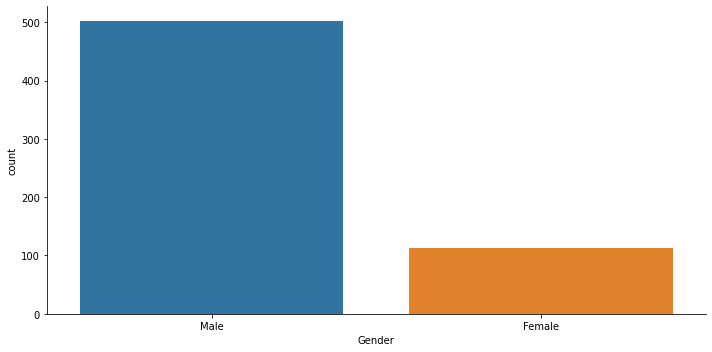

In [24]:
sns.catplot(x="Gender",kind='count',data=df,aspect=2)

In [25]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

From the graph, we can see most of the loan applicants are male. Almost 81% of the applicants are male.

### 2. Marital Status

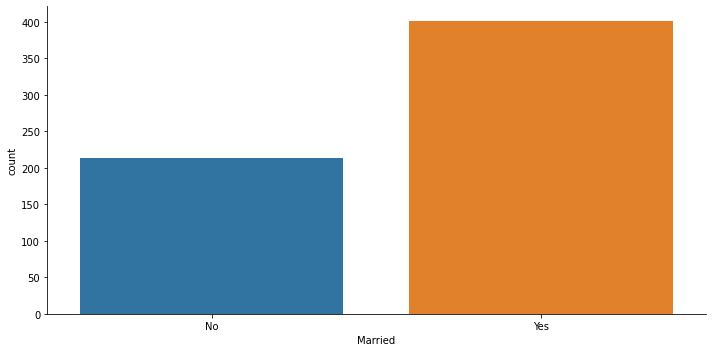

In [26]:
sns.catplot(x="Married",kind='count',data=df,aspect=2)

Most of the applicants are married. 

### 3. Dependents

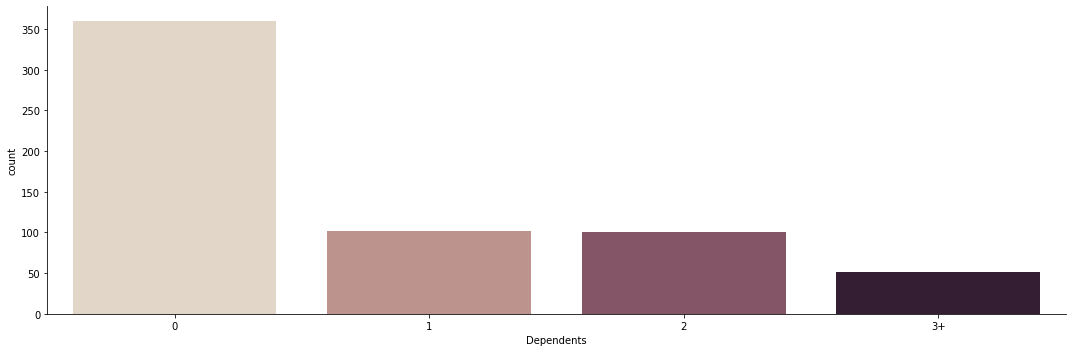

In [27]:
sns.catplot(x="Dependents", kind="count", palette="ch:.25", data=df, aspect=3)

More than 50% of the applicants have zero dependents while some of the applicants have 1 or 2 dependents. Few have 3+ dependents on them

### 4. Education:

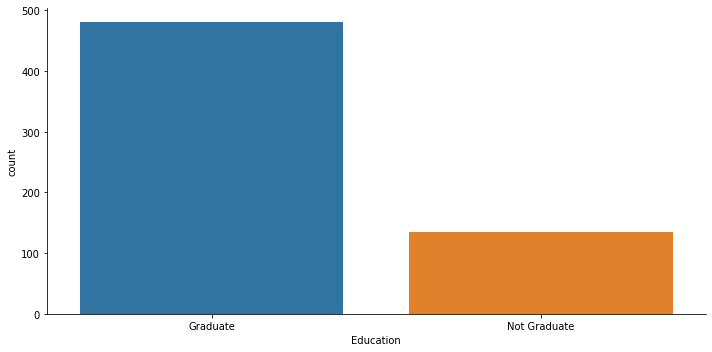

In [28]:
sns.catplot(x="Education",kind='count',data=df,aspect=2)

### 5. Whether Self Employed

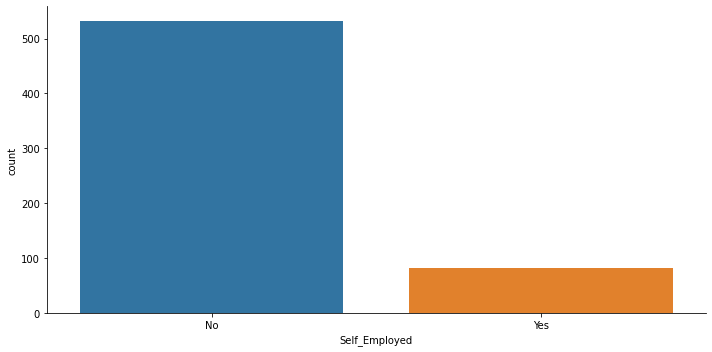

In [29]:
sns.catplot(x="Self_Employed",kind='count',data=df,aspect=2)

### 6. Applicant Income

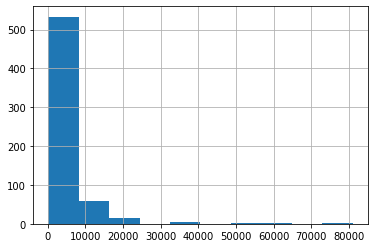

In [30]:
df['ApplicantIncome'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


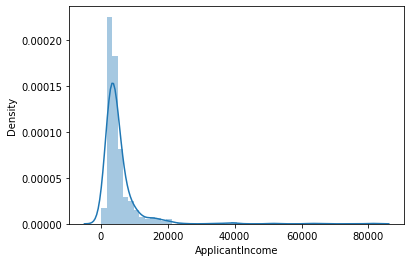

In [31]:
sns.distplot(df['ApplicantIncome'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


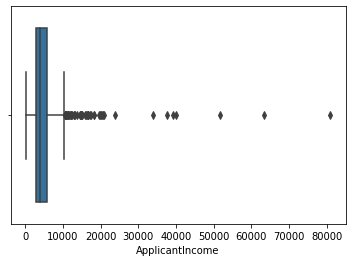

In [32]:
sns.boxplot(df['ApplicantIncome'])

### 7. Coapplicant Income

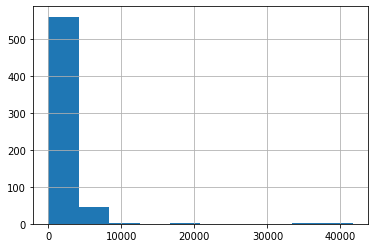

In [33]:
df['CoapplicantIncome'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


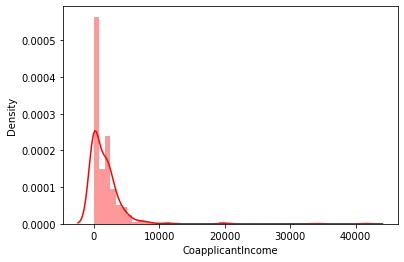

In [34]:
sns.distplot(df['CoapplicantIncome'],kde=True,color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


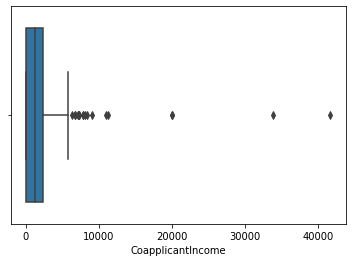

In [35]:
sns.boxplot(df['CoapplicantIncome'])

### 8. Loan Amount:

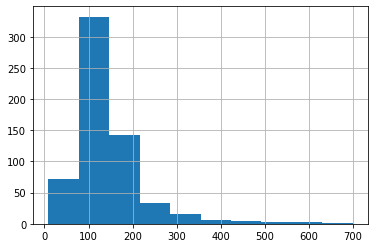

In [36]:
df['LoanAmount'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


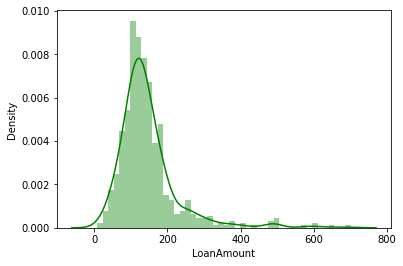

In [37]:
sns.distplot(df['LoanAmount'],kde=True,color='g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


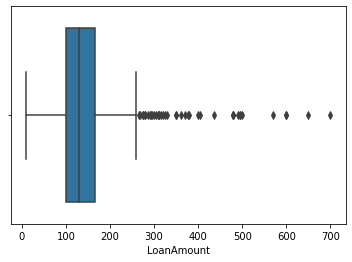

In [38]:
sns.boxplot(df['LoanAmount'])

In [39]:
print(df.LoanAmount.describe(percentiles = [0.10,0.25,0.30,0.50,0.60,0.75,0.85,0.90,1]))

count    614.000000
mean     146.412162
std       84.037468
min        9.000000
10%       72.300000
25%      100.250000
30%      109.900000
50%      129.000000
60%      140.000000
75%      164.750000
85%      188.100000
90%      229.400000
100%     700.000000
max      700.000000
Name: LoanAmount, dtype: float64


### 9. Loan Amount Term

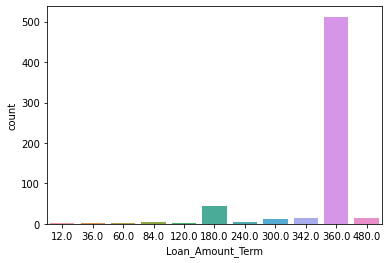

In [40]:
sns.countplot(x="Loan_Amount_Term",data=df)

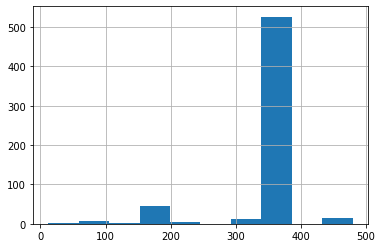

In [41]:
df['Loan_Amount_Term'].hist()

### 10. Credit History

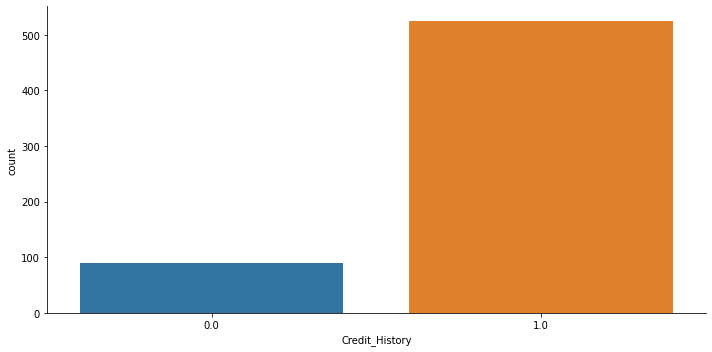

In [42]:
sns.catplot(x="Credit_History",kind='count',data=df,aspect=2)

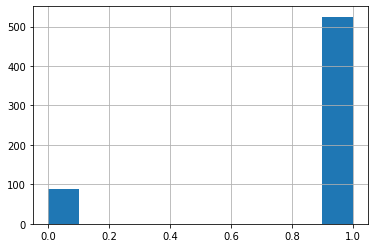

In [43]:
df['Credit_History'].hist()

### 11. Property Area

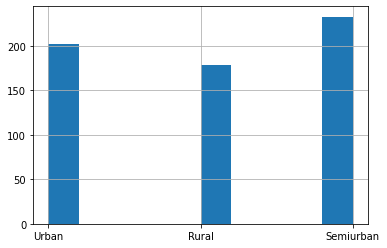

In [44]:
df['Property_Area'].hist()

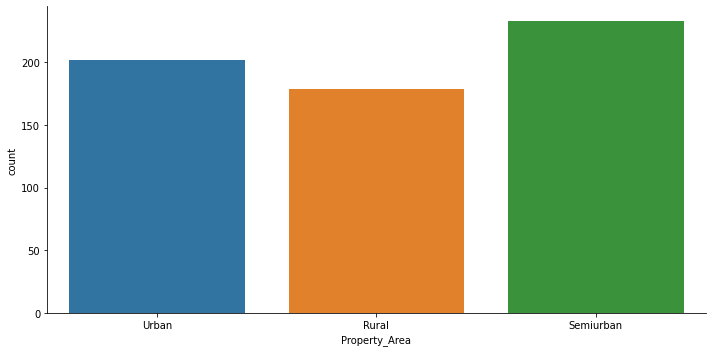

In [45]:
sns.catplot(x="Property_Area",kind='count',data=df,aspect=2)

### 12. Loan Status

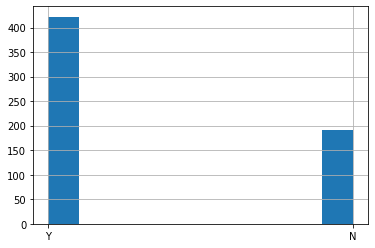

In [46]:
df['Loan_Status'].hist()

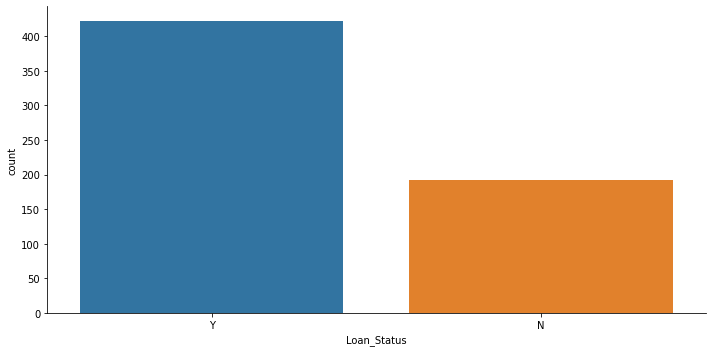

In [47]:
sns.catplot(x="Loan_Status",kind='count',data=df,aspect=2)

### Detailed Analysis with visualization:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Q1 value= 100.25
Q3 value= 164.75
IQR= 64.5
Upper whisker limit= 261.5
Lower whisker limit= 3.5


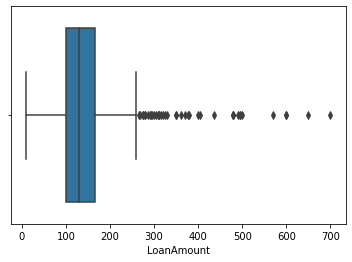

In [48]:
sns.boxplot(df['LoanAmount'])
Q3=df.LoanAmount.quantile(.75)
Q1=df.LoanAmount.quantile(.25)
IQR=Q3-Q1
print("Q1 value=",Q1)
print("Q3 value=",Q3)
print("IQR=",IQR)
print("Upper whisker limit=",(Q3+ (1.5*IQR)))
print("Lower whisker limit=",(Q1- (1.5*IQR)))

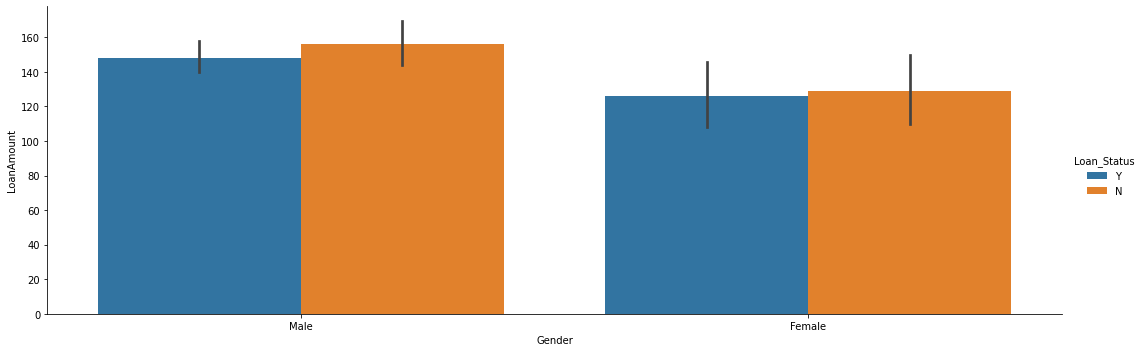

In [49]:
sns.catplot(x='Gender',y='LoanAmount',data=df,kind='bar',aspect=3,hue='Loan_Status')

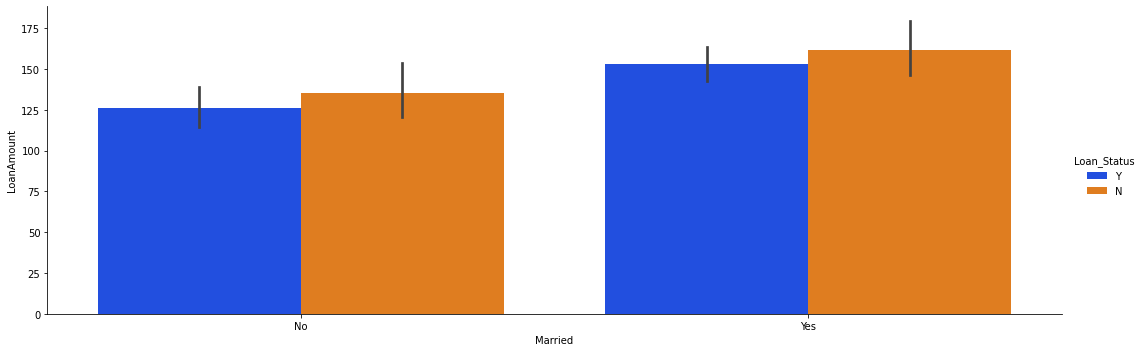

In [50]:
sns.catplot(x='Married',y='LoanAmount',data=df,kind='bar',aspect=3,palette='bright',hue='Loan_Status')

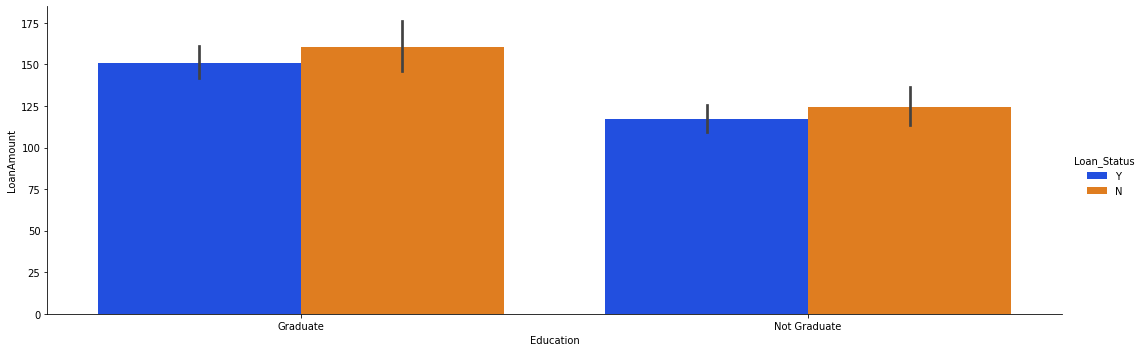

In [51]:
sns.catplot(x='Education',y='LoanAmount',data=df,kind='bar',aspect=3,palette='bright',hue='Loan_Status')

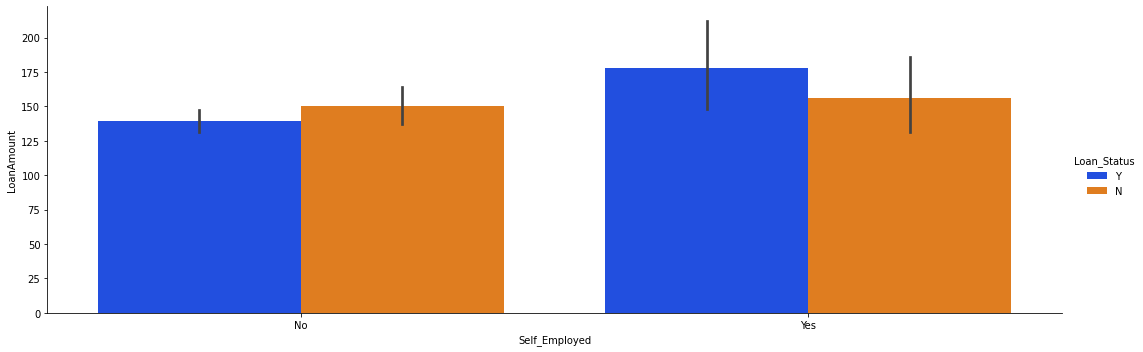

In [52]:
sns.catplot(x='Self_Employed',y='LoanAmount',data=df,kind='bar',aspect=3,palette='bright',hue='Loan_Status')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


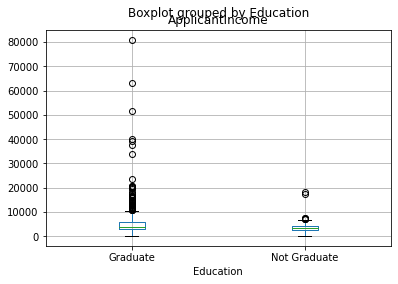

In [53]:
df.boxplot(column='ApplicantIncome', by = 'Education')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


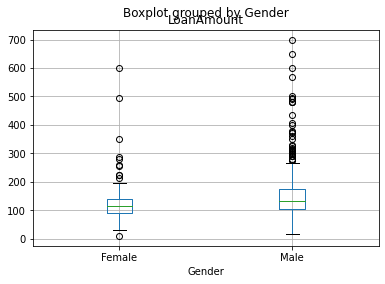

In [54]:
df.boxplot(column='LoanAmount', by = 'Gender')

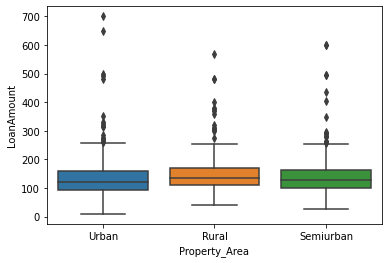

In [55]:
sns.boxplot(x = 'Property_Area', y = 'LoanAmount',  data = df)

Text(0, 0.5, 'Loan Amount')

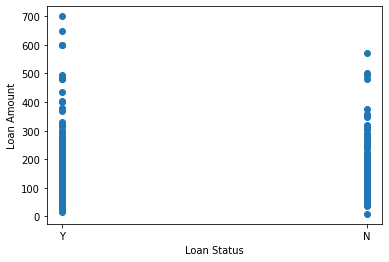

In [56]:
#plt.figure(1, figsize=(30,8))
plt.scatter(df['Loan_Status'],df['LoanAmount'])
plt.xlabel('Loan Status')
plt.ylabel("Loan Amount")

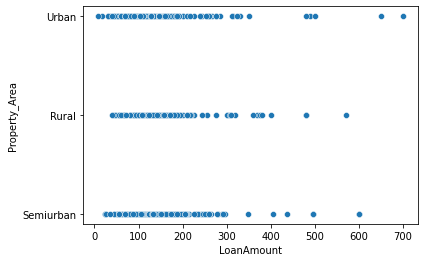

In [57]:
sns.scatterplot(x='LoanAmount', y='Property_Area', data=df)

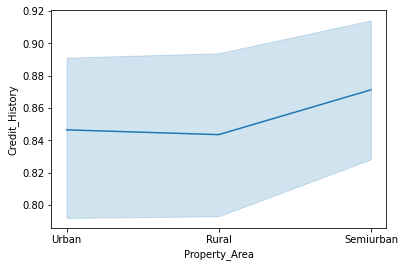

In [58]:
sns.lineplot(x='Property_Area', y='Credit_History', data=df)

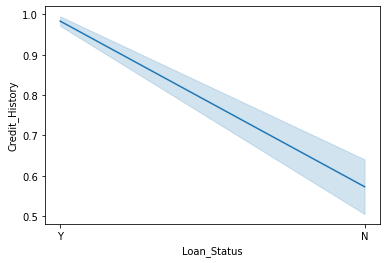

In [59]:
sns.lineplot(x='Loan_Status',y='Credit_History',data=df)

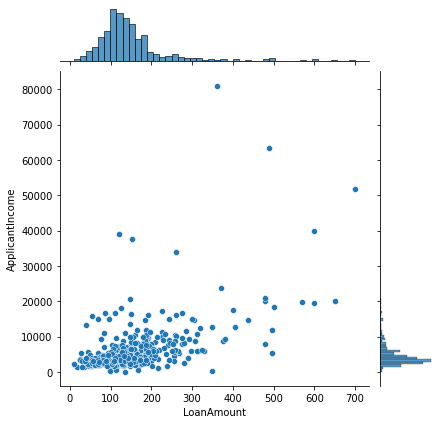

In [60]:
sns.jointplot(x=df['LoanAmount'],y=df['ApplicantIncome'],kind ="scatter")

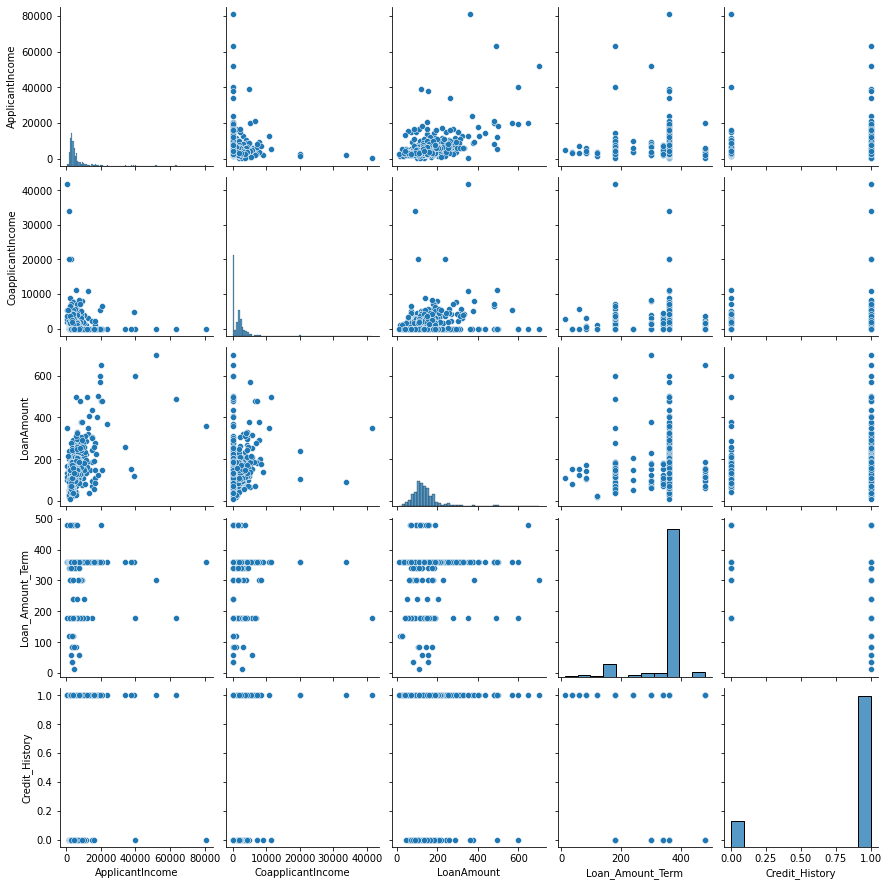

In [61]:
sns.pairplot(df)

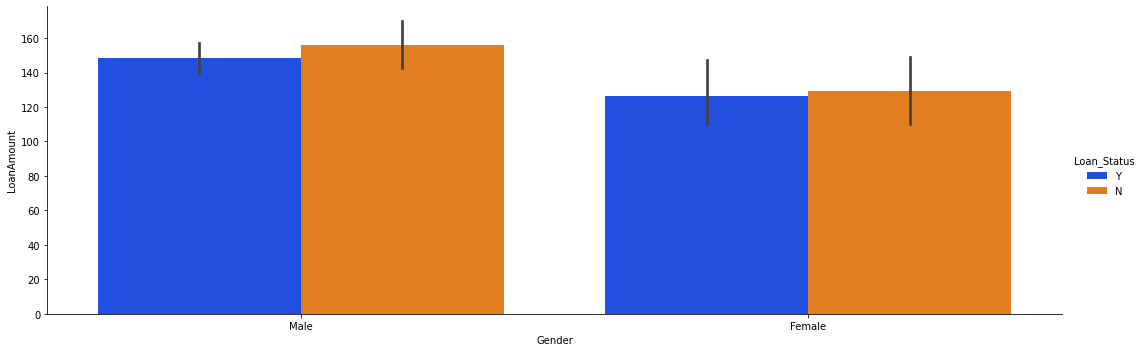

In [62]:
sns.catplot(x='Gender',y='LoanAmount',data=df,hue='Loan_Status',aspect=3,palette='bright',kind='bar')

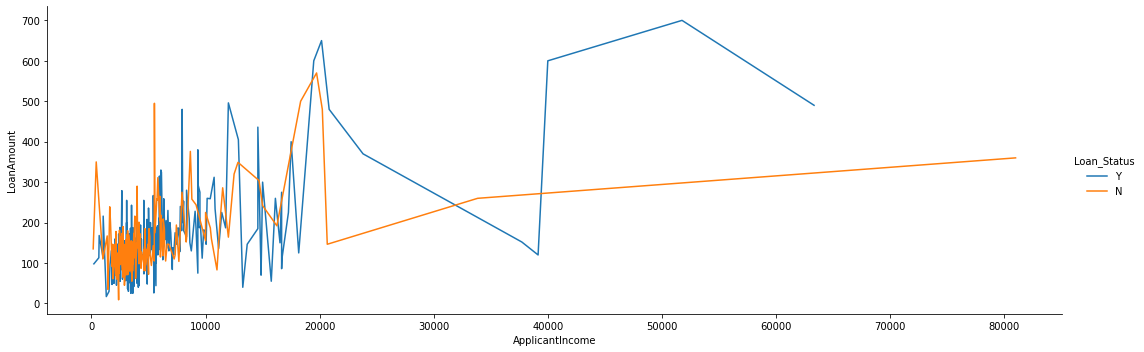

In [63]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", estimator=None, kind="line", data=df,aspect=3,hue='Loan_Status')

In [64]:
train_df_encoded = pd.get_dummies(df,drop_first=True)
train_df_encoded.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,
LP001002,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
LP001003,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
LP001005,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
LP001006,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
LP001008,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
LP001011,5417,4196.0,267.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,1
LP001013,2333,1516.0,95.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
LP001014,3036,2504.0,158.000000,360.0,0.0,1,1,0,0,1,0,0,1,0,0
LP001018,4006,1526.0,168.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [65]:
test_df_encoded = pd.get_dummies(df_test,drop_first=True)
test_df_encoded.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
Loan_ID,,,,,,,,,,,,,,
LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
LP001022,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
LP001031,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
LP001035,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
LP001051,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
LP001054,2165,3422,152.0,360.0,1.0,1,1,0,0,0,1,1,0,1
LP001055,2226,0,59.0,360.0,1.0,0,0,1,0,0,1,0,1,0
LP001056,3881,0,147.0,360.0,0.0,1,1,0,1,0,1,0,0,0
LP001059,13633,0,280.0,240.0,1.0,1,1,0,1,0,0,0,0,1


In [66]:
train_df_encoded.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [67]:
train_df_encoded.Gender_Male.value_counts()

1    502
0    112
Name: Gender_Male, dtype: int64

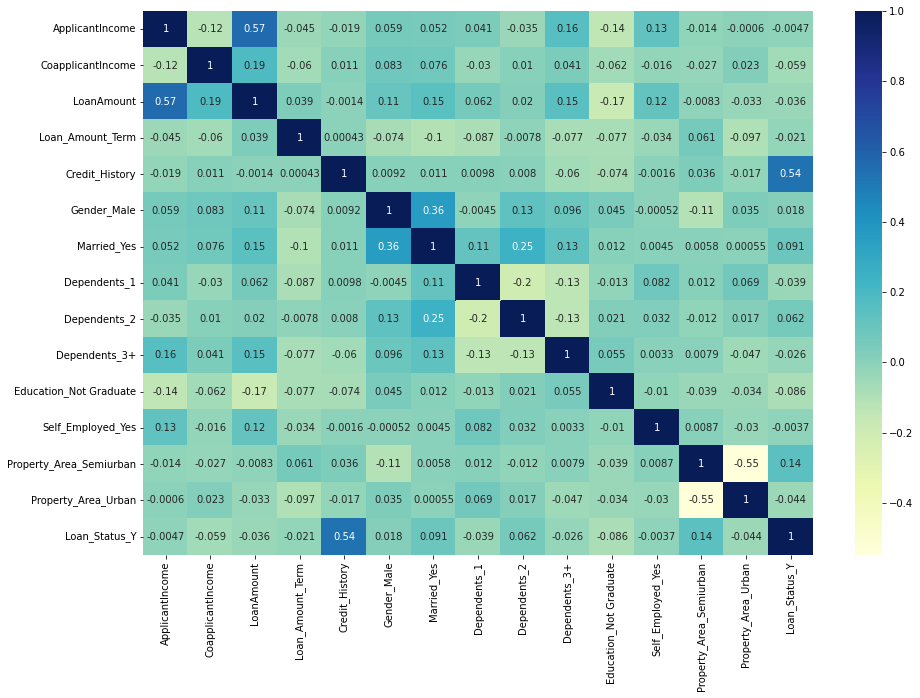

In [68]:
plt.figure(figsize = (15, 10))
sns.heatmap(train_df_encoded.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [69]:
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

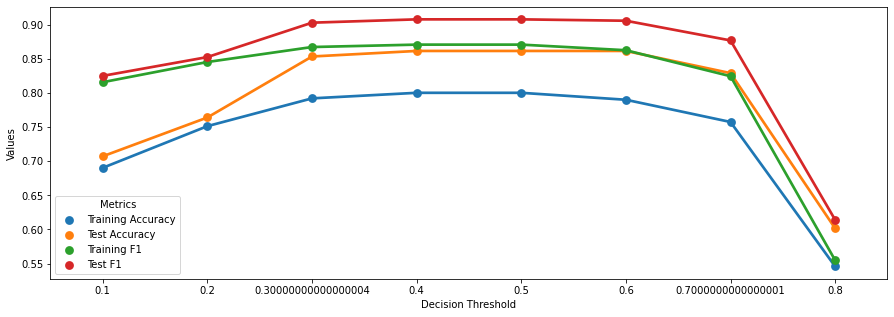

In [73]:
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [74]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


In [75]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8713910761154856
Train Accuracy  0.8004073319755601
Validation Mean F1 Score:  0.7021300922943281
Validation Mean Accuracy:  0.7922490208204495


In [76]:
y_pred = rf_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8455284552845529
Test F1 Score:  0.8983957219251337
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,20,18,38
1,1,84,85
All,21,102,123


In [77]:
test_pred = rf_clf.predict(test_df_encoded)

In [78]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [79]:
import collections

In [80]:
counter=collections.Counter(test_pred)

In [81]:
counter

Counter({0: 57, 1: 310})

In [82]:
df_test['Loan_Status']=test_pred

In [83]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [84]:
df_test['Loan_Status'].dtype

dtype('uint8')

In [85]:
df_test['Loan_Status'] = df_test['Loan_Status'].map(
                   {1:"Yes" ,0:"No"})

In [86]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes


In [87]:
df_test.to_csv("RF_Test_final.csv")

In [88]:
test_pred_logReg = logreg_clf.predict_proba(test_df_encoded)[:,1]

In [89]:

test_pred_logReg

array([0.78935578, 0.72555657, 0.80806406, 0.8134162 , 0.63019642,
       0.61743038, 0.73847461, 0.17057613, 0.86899029, 0.71425558,
       0.6287902 , 0.81889724, 0.84545933, 0.36711444, 0.85052019,
       0.67173924, 0.79827112, 0.86459432, 0.66676025, 0.88308683,
       0.62869868, 0.80586222, 0.73253895, 0.66770477, 0.71973225,
       0.04032269, 0.81999774, 0.72674343, 0.86609305, 0.81916574,
       0.78405664, 0.81759774, 0.80692025, 0.75811324, 0.77717267,
       0.2484369 , 0.87627259, 0.74009785, 0.70098143, 0.70372046,
       0.78189973, 0.76848106, 0.78473902, 0.78988828, 0.77121427,
       0.75155141, 0.67167689, 0.72238857, 0.68882902, 0.76306548,
       0.72404707, 0.79184673, 0.80295924, 0.90540363, 0.66989213,
       0.16374501, 0.65401172, 0.9305756 , 0.3719781 , 0.92756752,
       0.78519619, 0.75973957, 0.87871814, 0.17295856, 0.69529661,
       0.83927123, 0.22199063, 0.32058493, 0.86014626, 0.15385471,
       0.85381942, 0.82910868, 0.88495637, 0.71920641, 0.75870

In [90]:
thresh=0.4
test_pred_logReg = (test_pred_logReg > thresh).astype(int) 
test_pred_logReg

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [91]:
# df_test_logReg=df_test
df_test['Loan_Status_LR']=test_pred_logReg
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_LR
Loan_ID,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes,1
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes,1
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes,1
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes,1
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Yes,1
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Yes,1
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,Yes,1


In [92]:
df_test['Loan_Status_LR'] = df_test['Loan_Status_LR'].map(
                   {1:"Yes" ,0:"No"})

In [93]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_LR
Loan_ID,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes,Yes


In [94]:
df_test.to_csv("LR_Test_final.csv")

SVM

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [96]:
scaler=MinMaxScaler()
final_loan=scaler.fit_transform(X)
df_test_SVM=scaler.fit_transform(test_df_encoded)
final_loan

array([[0.07048856, 0.        , 0.19885986, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.03619171, 0.17221418, ..., 0.        , 0.        ,
        0.        ],
       [0.03525046, 0.        , 0.08248915, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.09798392, 0.00575995, 0.35311143, ..., 0.        , 0.        ,
        1.        ],
       [0.09193568, 0.        , 0.25759768, ..., 0.        , 0.        ,
        1.        ],
       [0.05482993, 0.        , 0.17945007, ..., 1.        , 1.        ,
        0.        ]])

In [97]:
xTrain, xTest, yTrain, yTest=train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled= scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)
df_test_SVM=scaler.transform(df_test_SVM)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [99]:
from sklearn import svm

In [100]:
clf=svm.SVC(kernel='rbf')
clf.fit(xTrain, yTrain)
loanpred=clf.predict(xTest)

In [101]:
loanpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

Text(0.5, 257.44, 'Predicted label')

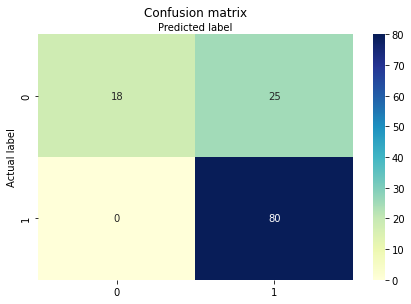

In [102]:
confusion_matrix = metrics.confusion_matrix(yTest,loanpred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt="g")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [103]:
metrics.accuracy_score(yTest, loanpred)

0.7967479674796748

In [104]:
from sklearn.metrics import f1_score

In [105]:
f1_score(yTest, loanpred, average='micro')

0.7967479674796748

In [106]:
df_test_SVM=clf.predict(df_test_SVM)

In [107]:
df_test_SVM

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [108]:
df_test['Loan_Status_SVM']=df_test_SVM
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_LR,Loan_Status_SVM
Loan_ID,,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes,Yes,1
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes,Yes,1
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes,Yes,1
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes,Yes,1
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Yes,Yes,1
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Yes,Yes,1
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,Yes,Yes,1


In [109]:
df_test['Loan_Status_SVM'] = df_test['Loan_Status_SVM'].map(
                   {1:"Yes" ,0:"No"})

In [111]:

df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_LR,Loan_Status_SVM
Loan_ID,,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Yes,Yes,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Yes,Yes,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Yes,Yes,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Yes,Yes,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Yes,Yes,Yes


In [112]:
df_test.to_csv("SVM_Test_final.csv")